### Ускорение
$$ S = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$


### Эффективность
$$ E = \frac{S}{p}  = \frac{T_\text{serial}}{p T_\text{parallel}}$$

## Аппроксимация ускорения и эффективности
* Для каждого числа потоков $p$ будем вычислять $T_{parallel}$ как среднее десяти (в случае rw_lock -- одного) запусков для одних и тех же входных данных.
* Временем работы программы $T_\text{serial}$ без распараллеливания будем считать как время работы программы, запущенной с параметром $\text{nthreads} = 1$.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks", {'axes.grid': True})

,threads,points,time
0,1,10,0.000208
1,1,100,0.000187
2,1,1000,0.000211
3,1,10000,0.000352
4,1,100000,0.001802
...,...,...,...
67,32,100000,0.002273
68,32,1000000,0.003485
69,32,10000000,0.019835
70,32,100000000,0.169888


In [67]:
def calc_acceleration_n_efficiency(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    lst = df[df['threads'] == 1]['time']
    lst = pd.concat([lst] * 9, axis = 0, ignore_index=True)
    df['acceleration'] = lst / df['time']
    df['efficiency'] = lst / (df['time'] * df['threads'])
    return df

,threads,points,time,acceleration,efficiency
0,1,10,0.000208,1.000000,1.000000
1,1,100,0.000187,1.000000,1.000000
2,1,1000,0.000211,1.000000,1.000000
3,1,10000,0.000352,1.000000,1.000000
4,1,100000,0.001802,1.000000,1.000000
...,...,...,...,...,...
67,32,100000,0.002273,0.792926,0.024779
68,32,1000000,0.003485,4.581772,0.143180
69,32,10000000,0.019835,7.619465,0.238108
70,32,100000000,0.169888,9.857977,0.308062


In [69]:
def show_main_figures(df: pd.DataFrame):
    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    plt.yscale('log')
    g.map(sns.barplot, 'threads', 'time').add_legend()
    g.set_ylabels("time in seconds")
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle("time")
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.5f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle("acceleration")
    g.map(sns.barplot, 'threads', 'acceleration').add_legend()
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

    g = sns.FacetGrid(df, col='points', col_wrap=3, height=3, aspect=2, hue='threads')
    g.map(sns.barplot, 'threads', 'efficiency').add_legend()
    g.figure.subplots_adjust(top=0.9) 
    g.figure.suptitle('efficiency')
    for ax in g.axes:
        for p in ax.patches:
                ax.annotate("%.4f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()  ),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
                
    plt.show()

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


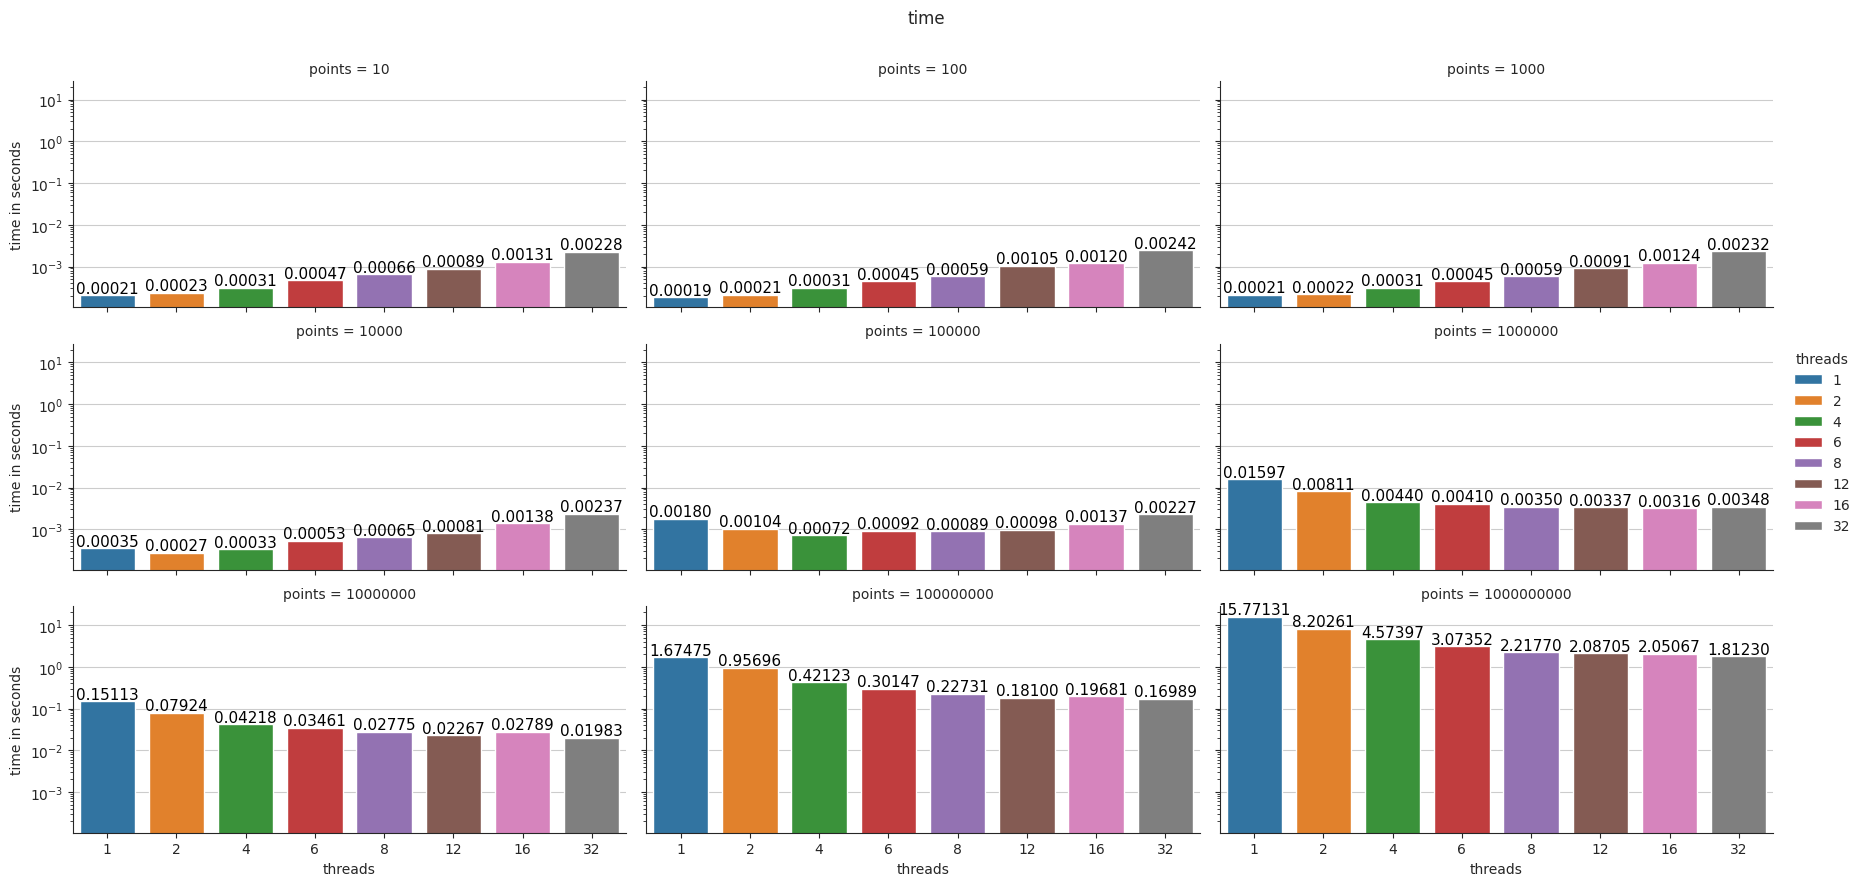

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


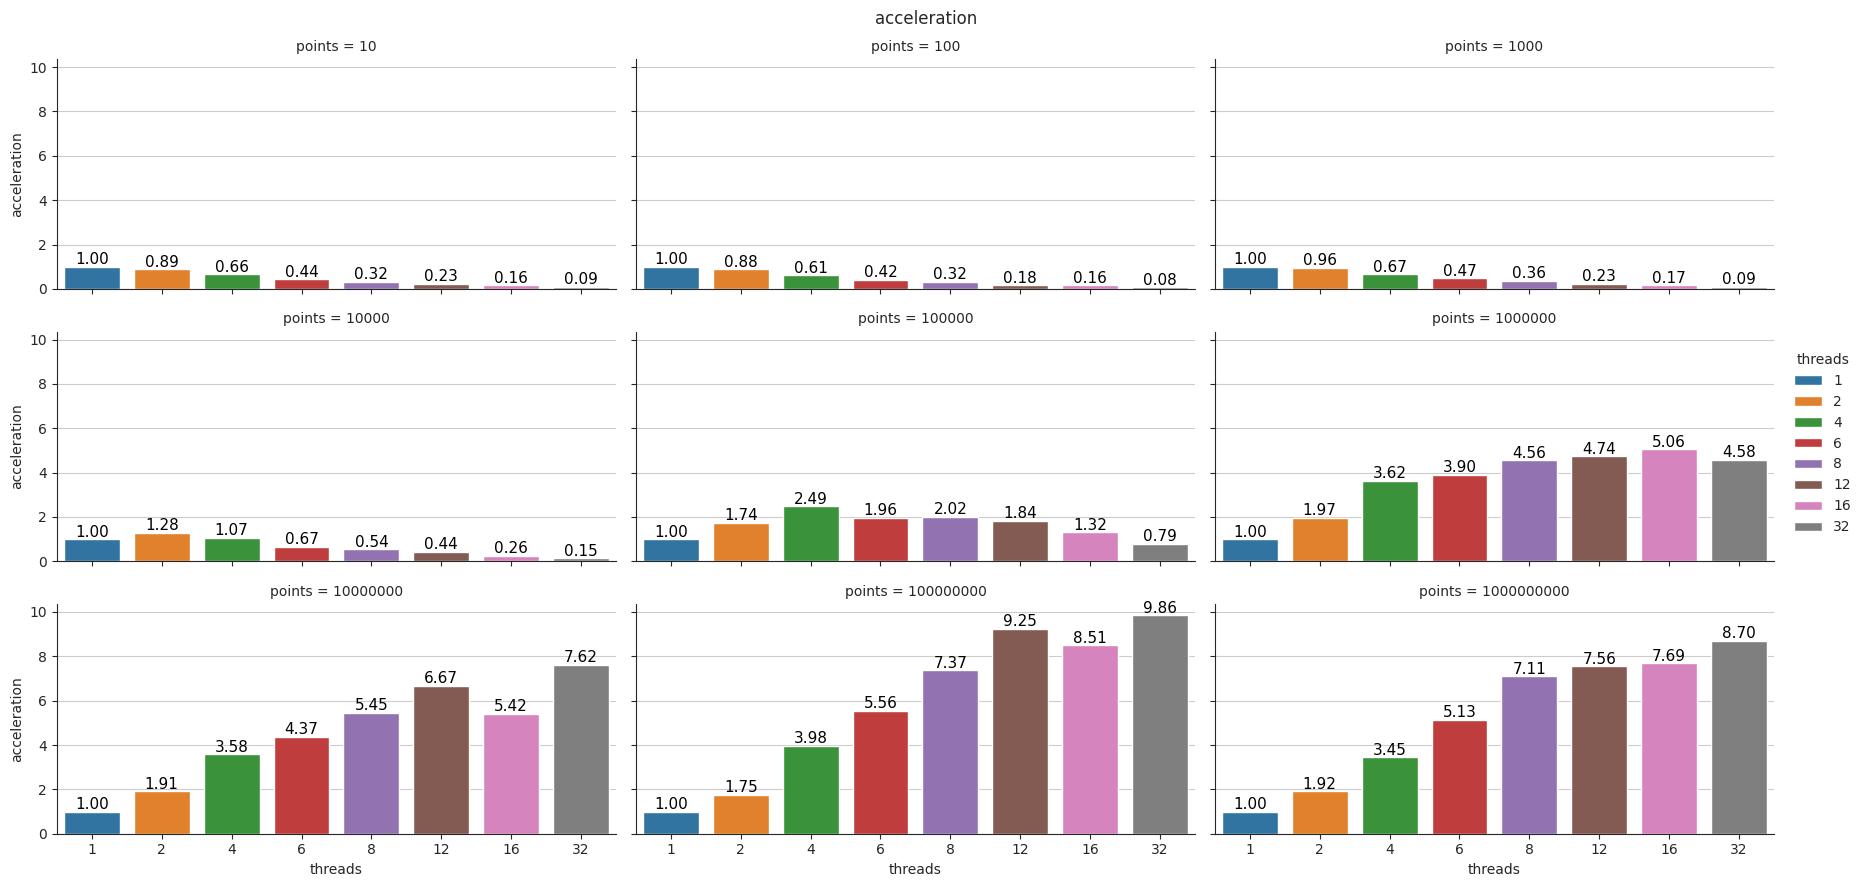

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


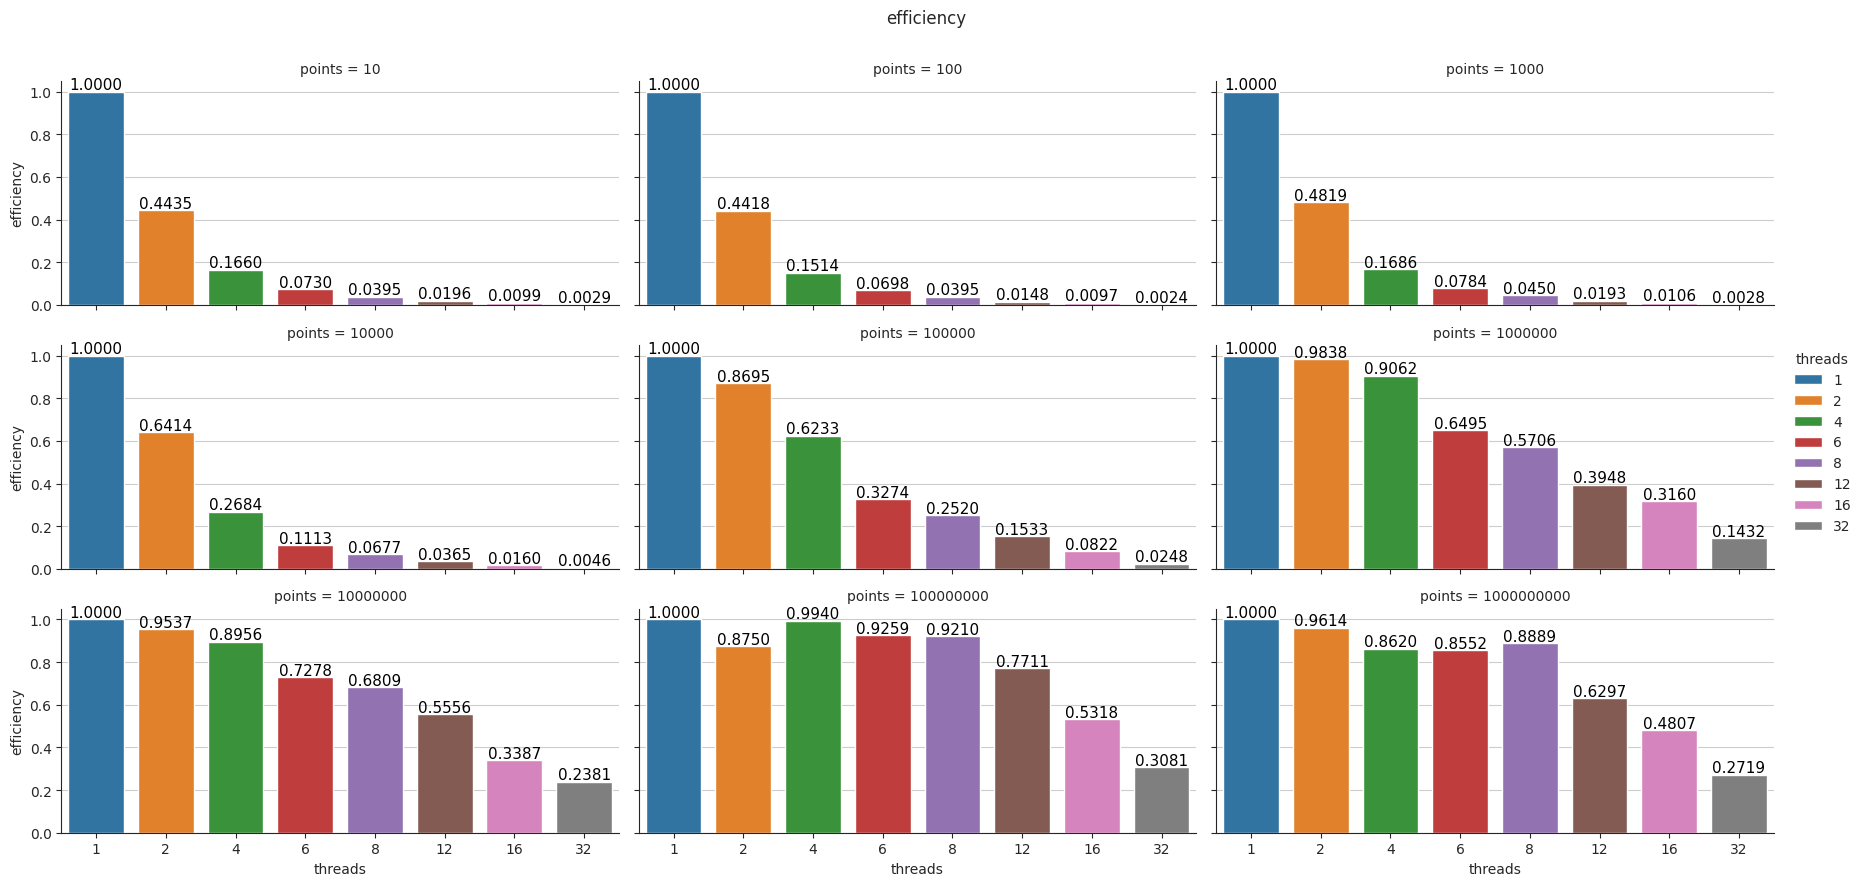

In [76]:
pi_df = pd.read_csv('csv/pi_time.csv', index_col=0)
pi_df = calc_acceleration_n_efficiency(pi_df)
show_main_figures(pi_df)

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


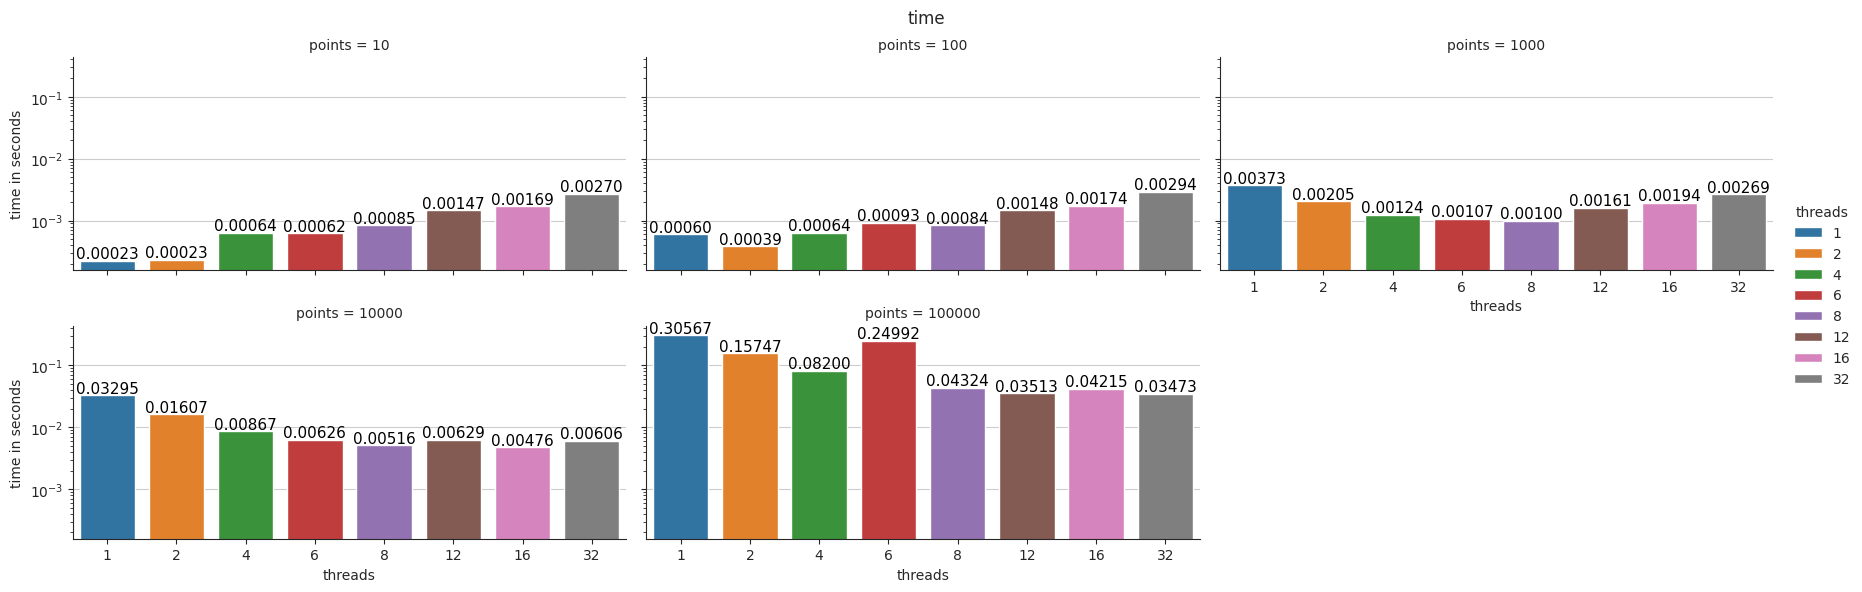

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


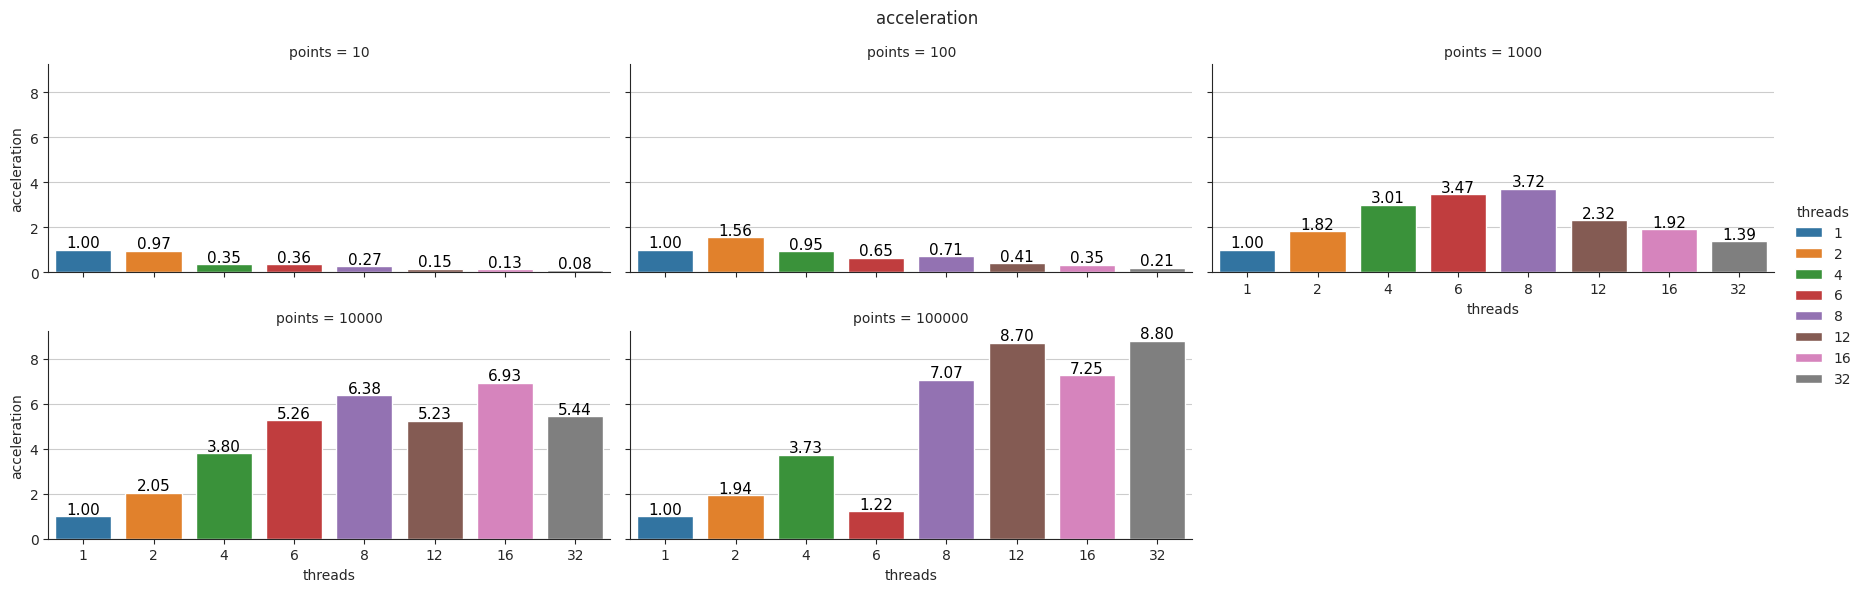

/home/george/parallelcalcs/pthreads/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


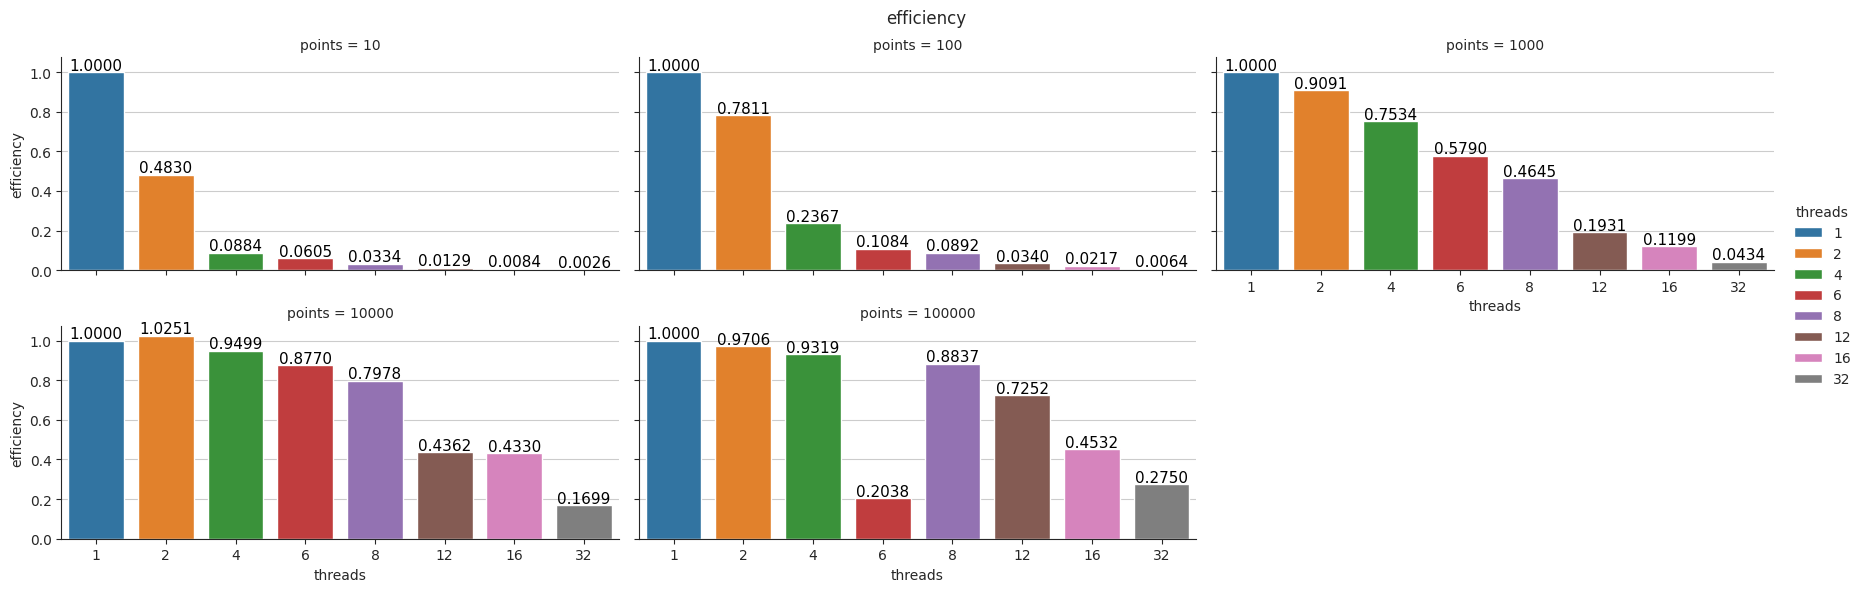

In [77]:
mandelbrot_df = pd.read_csv("./csv/mandelbrot_time.csv")
mandelbrot_df = calc_acceleration_n_efficiency(mandelbrot_df)
show_main_figures(mandelbrot_df)